Primary questions:
How have the prices of common, everyday consumer products changed over time?
How closely are the prices of these items correlated with each other?
Are the prices of such items correlated significantly with the interest rate?
If so, then by how much?

In [ ]:
# import libraries that we need for analyses
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression

Interest rate data were manually accessed from federal TIPS data as JSON then converted to a dataframe. Commodities data were downloaded and converted to dataframes.

In [ ]:
# access Interest rate/US macro data to idenitfy periods of downturn recession etc
# manually accessed FED CPI/TIPS data
tips_cpi_json = {"data":[{"cusip":"91282CNS6","interest_rate":"1.875000","security_term":"10-Year","original_auction_date":"2025-07-24","maturity_date":"2035-07-15","series":"D-2035","original_issue_date":"2025-07-31","dated_date":"2025-07-15","ref_cpi_on_dated_date":"321.097580","additional_issue_date":"null"},{"cusip":"91282CNB3","interest_rate":"1.625000","security_term":"5-Year","original_auction_date":"2025-04-17","maturity_date":"2030-04-15","series":"X-2030","original_issue_date":"2025-04-30","dated_date":"2025-04-15","ref_cpi_on_dated_date":"318.329470","additional_issue_date":"null"},{"cusip":"912810UH9","interest_rate":"2.375000","security_term":"30-Year","original_auction_date":"2025-02-20","maturity_date":"2055-02-15","series":"TIPS of February 2055","original_issue_date":"2025-02-28","dated_date":"2025-02-15","ref_cpi_on_dated_date":"315.549000","additional_issue_date":"null"},{"cusip":"91282CML2","interest_rate":"2.125000","security_term":"10-Year","original_auction_date":"2025-01-23","maturity_date":"2035-01-15","series":"A-2035","original_issue_date":"2025-01-31","dated_date":"2025-01-15","ref_cpi_on_dated_date":"315.586770","additional_issue_date":"null"},{"cusip":"91282CLV1","interest_rate":"1.625000","security_term":"5-Year","original_auction_date":"2024-10-24","maturity_date":"2029-10-15","series":"AE-2029","original_issue_date":"2024-10-31","dated_date":"2024-10-15","ref_cpi_on_dated_date":"314.655610","additional_issue_date":"null"},{"cusip":"91282CLE9","interest_rate":"1.875000","security_term":"10-Year","original_auction_date":"2024-07-18","maturity_date":"2034-07-15","series":"D-2034","original_issue_date":"2024-07-31","dated_date":"2024-07-15","ref_cpi_on_dated_date":"313.783290","additional_issue_date":"null"},{"cusip":"91282CKL4","interest_rate":"2.125000","security_term":"5-Year","original_auction_date":"2024-04-18","maturity_date":"2029-04-15","series":"X-2029","original_issue_date":"2024-04-30","dated_date":"2024-04-15","ref_cpi_on_dated_date":"309.307870","additional_issue_date":"null"},{"cusip":"912810TY4","interest_rate":"2.125000","security_term":"30-Year","original_auction_date":"2024-02-22","maturity_date":"2054-02-15","series":"TIPS of February 2054","original_issue_date":"2024-02-29","dated_date":"2024-02-15","ref_cpi_on_dated_date":"306.903760","additional_issue_date":"null"},{"cusip":"91282CJY8","interest_rate":"1.750000","security_term":"10-Year","original_auction_date":"2024-01-18","maturity_date":"2034-01-15","series":"A-2034","original_issue_date":"2024-01-31","dated_date":"2024-01-15","ref_cpi_on_dated_date":"307.391000","additional_issue_date":"null"},{"cusip":"91282CJH5","interest_rate":"2.375000","security_term":"5-Year","original_auction_date":"2023-10-19","maturity_date":"2028-10-15","series":"AE-2028","original_issue_date":"2023-10-31","dated_date":"2023-10-15","ref_cpi_on_dated_date":"306.293900","additional_issue_date":"null"},{"cusip":"91282CHP9","interest_rate":"1.375000","security_term":"10-Year","original_auction_date":"2023-07-20","maturity_date":"2033-07-15","series":"D-2033","original_issue_date":"2023-07-31","dated_date":"2023-07-15","ref_cpi_on_dated_date":"303.708030","additional_issue_date":"null"},{"cusip":"91282CGW5","interest_rate":"1.250000","security_term":"5-Year","original_auction_date":"2023-04-20","maturity_date":"2028-04-15","series":"X-2028","original_issue_date":"2023-04-28","dated_date":"2023-04-15","ref_cpi_on_dated_date":"299.949330","additional_issue_date":"null"},{"cusip":"912810TP3","interest_rate":"1.500000","security_term":"30-Year","original_auction_date":"2023-02-16","maturity_date":"2053-02-15","series":"TIPS of February 2053","original_issue_date":"2023-02-28","dated_date":"2023-02-15","ref_cpi_on_dated_date":"297.254000","additional_issue_date":"null"},{"cusip":"91282CGK1","interest_rate":"1.125000","security_term":"10-Year","original_auction_date":"2023-01-19","maturity_date":"2033-01-15","series":"A-2033","original_issue_date":"2023-01-31","dated_date":"2023-01-15","ref_cpi_on_dated_date":"297.876060","additional_issue_date":"null"},{"cusip":"91282CFR7","interest_rate":"1.625000","security_term":"5-Year","original_auction_date":"2022-10-20","maturity_date":"2027-10-15","series":"AE-2027","original_issue_date":"2022-10-31","dated_date":"2022-10-15","ref_cpi_on_dated_date":"296.228580","additional_issue_date":"null"},{"cusip":"91282CEZ0","interest_rate":"0.625000","security_term":"10-Year","original_auction_date":"2022-07-21","maturity_date":"2032-07-15","series":"D-2032","original_issue_date":"2022-07-29","dated_date":"2022-07-15","ref_cpi_on_dated_date":"290.548290","additional_issue_date":"null"},{"cusip":"91282CEJ6","interest_rate":"0.125000","security_term":"5-Year","original_auction_date":"2022-04-21","maturity_date":"2027-04-15","series":"X-2027","original_issue_date":"2022-04-29","dated_date":"2022-04-15","ref_cpi_on_dated_date":"282.346400","additional_issue_date":"null"},{"cusip":"912810TE8","interest_rate":"0.125000","security_term":"30-Year","original_auction_date":"2022-02-17","maturity_date":"2052-02-15","series":"TIPS of February 2052","original_issue_date":"2022-02-28","dated_date":"2022-02-15","ref_cpi_on_dated_date":"278.375000","additional_issue_date":"null"},{"cusip":"91282CDX6","interest_rate":"0.125000","security_term":"10-Year","original_auction_date":"2022-01-20","maturity_date":"2032-01-15","series":"A-2032","original_issue_date":"2022-01-31","dated_date":"2022-01-15","ref_cpi_on_dated_date":"277.202740","additional_issue_date":"null"},{"cusip":"91282CDC2","interest_rate":"0.125000","security_term":"5-Year","original_auction_date":"2021-10-21","maturity_date":"2026-10-15","series":"AE-2026","original_issue_date":"2021-10-29","dated_date":"2021-10-15","ref_cpi_on_dated_date":"273.257710","additional_issue_date":"null"},{"cusip":"91282CCM1","interest_rate":"0.125000","security_term":"10-Year","original_auction_date":"2021-07-22","maturity_date":"2031-07-15","series":"D-2031","original_issue_date":"2021-07-30","dated_date":"2021-07-15","ref_cpi_on_dated_date":"268.020900","additional_issue_date":"null"},{"cusip":"91282CCA7","interest_rate":"0.125000","security_term":"5-Year","original_auction_date":"2021-04-22","maturity_date":"2026-04-15","series":"X-2026","original_issue_date":"2021-04-30","dated_date":"2021-04-15","ref_cpi_on_dated_date":"262.250270","additional_issue_date":"null"},{"cusip":"912810SV1","interest_rate":"0.125000","security_term":"30-Year","original_auction_date":"2021-02-18","maturity_date":"2051-02-15","series":"TIPS of February 2051","original_issue_date":"2021-02-26","dated_date":"2021-02-15","ref_cpi_on_dated_date":"260.351500","additional_issue_date":"null"},{"cusip":"91282CBF7","interest_rate":"0.125000","security_term":"10-Year","original_auction_date":"2021-01-21","maturity_date":"2031-01-15","series":"A-2031","original_issue_date":"2021-01-29","dated_date":"2021-01-15","ref_cpi_on_dated_date":"260.316190","additional_issue_date":"null"},{"cusip":"91282CAQ4","interest_rate":"0.125000","security_term":"5-Year","original_auction_date":"2020-10-22","maturity_date":"2025-10-15","series":"AE-2025","original_issue_date":"2020-10-30","dated_date":"2020-10-15","ref_cpi_on_dated_date":"259.469970","additional_issue_date":"null"},{"cusip":"912828ZZ6","interest_rate":"0.125000","security_term":"10-Year","original_auction_date":"2020-07-23","maturity_date":"2030-07-15","series":"D-2030","original_issue_date":"2020-07-31","dated_date":"2020-07-15","ref_cpi_on_dated_date":"256.391260","additional_issue_date":"null"},{"cusip":"912810SM1","interest_rate":"0.250000","security_term":"30-Year","original_auction_date":"2020-02-20","maturity_date":"2050-02-15","series":"TIPS of February 2050","original_issue_date":"2020-02-28","dated_date":"2020-02-15","ref_cpi_on_dated_date":"257.095030","additional_issue_date":"null"},{"cusip":"912828Z37","interest_rate":"0.125000","security_term":"10-Year","original_auction_date":"2020-01-23","maturity_date":"2030-01-15","series":"A-2030","original_issue_date":"2020-01-31","dated_date":"2020-01-15","ref_cpi_on_dated_date":"257.283680","additional_issue_date":"null"},{"cusip":"9128287D6","interest_rate":"0.250000","security_term":"10-Year","original_auction_date":"2019-07-18","maturity_date":"2029-07-15","series":"D-2029","original_issue_date":"2019-07-31","dated_date":"2019-07-15","ref_cpi_on_dated_date":"255.793680","additional_issue_date":"null"},{"cusip":"912810SG4","interest_rate":"1.000000","security_term":"30-Year","original_auction_date":"2019-02-21","maturity_date":"2049-02-15","series":"TIPS of February 2049","original_issue_date":"2019-02-28","dated_date":"2019-02-15","ref_cpi_on_dated_date":"251.635500","additional_issue_date":"null"},{"cusip":"9128285W6","interest_rate":"0.875000","security_term":"10-Year","original_auction_date":"2019-01-17","maturity_date":"2029-01-15","series":"A-2029","original_issue_date":"2019-01-31","dated_date":"2019-01-15","ref_cpi_on_dated_date":"252.502480","additional_issue_date":"null"},{"cusip":"912828Y38","interest_rate":"0.750000","security_term":"10-Year","original_auction_date":"2018-07-19","maturity_date":"2028-07-15","series":"D-2028","original_issue_date":"2018-07-31","dated_date":"2018-07-15","ref_cpi_on_dated_date":"251.016580","additional_issue_date":"null"},{"cusip":"912810SB5","interest_rate":"1.000000","security_term":"30-Year","original_auction_date":"2018-02-15","maturity_date":"2048-02-15","series":"TIPS of February 2048","original_issue_date":"2018-02-28","dated_date":"2018-02-15","ref_cpi_on_dated_date":"246.596500","additional_issue_date":"null"},{"cusip":"9128283R9","interest_rate":"0.500000","security_term":"10-Year","original_auction_date":"2018-01-18","maturity_date":"2028-01-15","series":"A-2028","original_issue_date":"2018-01-31","dated_date":"2018-01-15","ref_cpi_on_dated_date":"246.665710","additional_issue_date":"null"},{"cusip":"9128282L3","interest_rate":"0.375000","security_term":"10-Year","original_auction_date":"2017-07-20","maturity_date":"2027-07-15","series":"D-2027","original_issue_date":"2017-07-31","dated_date":"2017-07-15","ref_cpi_on_dated_date":"244.618390","additional_issue_date":"null"},{"cusip":"912810RW0","interest_rate":"0.875000","security_term":"30-Year","original_auction_date":"2017-02-16","maturity_date":"2047-02-15","series":"TIPS of February 2047","original_issue_date":"2017-02-28","dated_date":"2017-02-15","ref_cpi_on_dated_date":"241.392500","additional_issue_date":"null"},{"cusip":"912828V49","interest_rate":"0.375000","security_term":"10-Year","original_auction_date":"2017-01-19","maturity_date":"2027-01-15","series":"A-2027","original_issue_date":"2017-01-31","dated_date":"2017-01-15","ref_cpi_on_dated_date":"241.559190","additional_issue_date":"null"},{"cusip":"912828S50","interest_rate":"0.125000","security_term":"10-Year","original_auction_date":"2016-07-21","maturity_date":"2026-07-15","series":"D-2026","original_issue_date":"2016-07-29","dated_date":"2016-07-15","ref_cpi_on_dated_date":"239.701320","additional_issue_date":"null"},{"cusip":"912810RR1","interest_rate":"1.000000","security_term":"30-Year","original_auction_date":"2016-02-18","maturity_date":"2046-02-15","series":"TIPS of February 2046","original_issue_date":"2016-02-29","dated_date":"2016-02-15","ref_cpi_on_dated_date":"236.944480","additional_issue_date":"null"},{"cusip":"912828N71","interest_rate":"0.625000","security_term":"10-Year","original_auction_date":"2016-01-21","maturity_date":"2026-01-15","series":"A-2026","original_issue_date":"2016-01-29","dated_date":"2016-01-15","ref_cpi_on_dated_date":"237.611290","additional_issue_date":"null"},{"cusip":"912810RL4","interest_rate":"0.750000","security_term":"30-Year","original_auction_date":"2015-02-19","maturity_date":"2045-02-15","series":"TIPS of February 2045","original_issue_date":"2015-02-27","dated_date":"2015-02-15","ref_cpi_on_dated_date":"235.481500","additional_issue_date":"null"},{"cusip":"912810RF7","interest_rate":"1.375000","security_term":"30-Year","original_auction_date":"2014-02-20","maturity_date":"2044-02-15","series":"TIPS of February 2044","original_issue_date":"2014-02-28","dated_date":"2014-02-15","ref_cpi_on_dated_date":"233.059000","additional_issue_date":"null"},{"cusip":"912810RA8","interest_rate":"0.625000","security_term":"30-Year","original_auction_date":"2013-02-21","maturity_date":"2043-02-15","series":"TIPS of February 2043","original_issue_date":"2013-02-28","dated_date":"2013-02-15","ref_cpi_on_dated_date":"229.911000","additional_issue_date":"null"},{"cusip":"912810QV3","interest_rate":"0.750000","security_term":"30-Year","original_auction_date":"2012-02-16","maturity_date":"2042-02-15","series":"TIPS of February 2042","original_issue_date":"2012-02-29","dated_date":"2012-02-15","ref_cpi_on_dated_date":"225.960620","additional_issue_date":"null"},{"cusip":"912810QP6","interest_rate":"2.125000","security_term":"30-Year","original_auction_date":"2011-02-17","maturity_date":"2041-02-15","series":"TIPS of February 2041","original_issue_date":"2011-02-28","dated_date":"2011-02-15","ref_cpi_on_dated_date":"218.991000","additional_issue_date":"null"},{"cusip":"912810QF8","interest_rate":"2.125000","security_term":"30-Year","original_auction_date":"2010-02-22","maturity_date":"2040-02-15","series":"TIPS of February 2040","original_issue_date":"2010-02-26","dated_date":"2010-02-15","ref_cpi_on_dated_date":"216.139500","additional_issue_date":"null"},{"cusip":"912810PZ5","interest_rate":"2.500000","security_term":"20-Year","original_auction_date":"2009-01-26","maturity_date":"2029-01-15","series":"TIPS of January 2029","original_issue_date":"2009-01-30","dated_date":"2009-01-15","ref_cpi_on_dated_date":"214.699710","additional_issue_date":"null"},{"cusip":"912810PV4","interest_rate":"1.750000","security_term":"20-Year","original_auction_date":"2008-01-24","maturity_date":"2028-01-15","series":"TIPS of January 2028","original_issue_date":"2008-01-31","dated_date":"2008-01-15","ref_cpi_on_dated_date":"209.496450","additional_issue_date":"null"},{"cusip":"912810PS1","interest_rate":"2.375000","security_term":"20-Year","original_auction_date":"2007-01-23","maturity_date":"2027-01-15","series":"TIPS of January 2027","original_issue_date":"2007-01-31","dated_date":"2007-01-15","ref_cpi_on_dated_date":"201.664520","additional_issue_date":"null"},{"cusip":"912810FS2","interest_rate":"2.000000","security_term":"20-Year","original_auction_date":"2006-01-24","maturity_date":"2026-01-15","series":"TIPS of January 2026","original_issue_date":"2006-01-31","dated_date":"2006-01-15","ref_cpi_on_dated_date":"198.477420","additional_issue_date":"null"},{"cusip":"912810FQ6","interest_rate":"3.375000","security_term":"30-Year 6-Month","original_auction_date":"2001-10-10","maturity_date":"2032-04-15","series":"TIPS of April 2032","original_issue_date":"2001-10-15","dated_date":"2001-10-15","ref_cpi_on_dated_date":"177.500000","additional_issue_date":"null"},{"cusip":"912810FH6","interest_rate":"3.875000","security_term":"30-Year","original_auction_date":"1999-04-07","maturity_date":"2029-04-15","series":"TIPS of April 2029","original_issue_date":"1999-04-15","dated_date":"1999-04-15","ref_cpi_on_dated_date":"164.393330","additional_issue_date":"null"},{"cusip":"912810FD5","interest_rate":"3.625000","security_term":"30-Year","original_auction_date":"1998-04-08","maturity_date":"2028-04-15","series":"TIPS of April 2028","original_issue_date":"1998-04-15","dated_date":"1998-04-15","ref_cpi_on_dated_date":"161.740000","additional_issue_date":"null"}]}


In [ ]:
# view data, read as json format
tips_cpi = tips_cpi_json['data']
tips_cpi

[{'cusip': '91282CNS6',
  'interest_rate': '1.875000',
  'security_term': '10-Year',
  'original_auction_date': '2025-07-24',
  'maturity_date': '2035-07-15',
  'series': 'D-2035',
  'original_issue_date': '2025-07-31',
  'dated_date': '2025-07-15',
  'ref_cpi_on_dated_date': '321.097580',
  'additional_issue_date': 'null'},
 {'cusip': '91282CNB3',
  'interest_rate': '1.625000',
  'security_term': '5-Year',
  'original_auction_date': '2025-04-17',
  'maturity_date': '2030-04-15',
  'series': 'X-2030',
  'original_issue_date': '2025-04-30',
  'dated_date': '2025-04-15',
  'ref_cpi_on_dated_date': '318.329470',
  'additional_issue_date': 'null'},
 {'cusip': '912810UH9',
  'interest_rate': '2.375000',
  'security_term': '30-Year',
  'original_auction_date': '2025-02-20',
  'maturity_date': '2055-02-15',
  'series': 'TIPS of February 2055',
  'original_issue_date': '2025-02-28',
  'dated_date': '2025-02-15',
  'ref_cpi_on_dated_date': '315.549000',
  'additional_issue_date': 'null'},
 {'cu

In [ ]:
# create lists to store data for date of record collection, interest rate at time, and cpi
original_auction_dates, ir, cpi = [], [], []

for i in range(len(tips_cpi)):
  original_auction_dates.append(tips_cpi[i]['original_auction_date'])
  ir.append(tips_cpi[i]['interest_rate'])
  cpi.append(tips_cpi[i]['ref_cpi_on_dated_date'])

print(ir)

['1.875000', '1.625000', '2.375000', '2.125000', '1.625000', '1.875000', '2.125000', '2.125000', '1.750000', '2.375000', '1.375000', '1.250000', '1.500000', '1.125000', '1.625000', '0.625000', '0.125000', '0.125000', '0.125000', '0.125000', '0.125000', '0.125000', '0.125000', '0.125000', '0.125000', '0.125000', '0.250000', '0.125000', '0.250000', '1.000000', '0.875000', '0.750000', '1.000000', '0.500000', '0.375000', '0.875000', '0.375000', '0.125000', '1.000000', '0.625000', '0.750000', '1.375000', '0.625000', '0.750000', '2.125000', '2.125000', '2.500000', '1.750000', '2.375000', '2.000000', '3.375000', '3.875000', '3.625000']


In [ ]:
# uses lists from above to create df of date of issuance, interest rate, cpi
interest_rates = pd.DataFrame({'Date of Issuance':original_auction_dates, 'Interest Rate':ir, 'CPI':cpi})
interest_rates

,Date of Issuance,Interest Rate,CPI
0,2025-07-24,1.875000,321.097580
1,2025-04-17,1.625000,318.329470
2,2025-02-20,2.375000,315.549000
3,2025-01-23,2.125000,315.586770
4,2024-10-24,1.625000,314.655610
5,2024-07-18,1.875000,313.783290
6,2024-04-18,2.125000,309.307870
7,2024-02-22,2.125000,306.903760
8,2024-01-18,1.750000,307.391000
9,2023-10-19,2.375000,306.293900


In [ ]:
# upload data from FRED on historical egg, milk, and bread prices
# access through Google Drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
egg_prices = pd.read_csv('/content/drive/MyDrive/Data Bootcamp Group/egg_prices.csv')
milk_prices = pd.read_csv('/content/drive/MyDrive/Data Bootcamp Group/milk_prices.csv')
bread_prices = pd.read_csv('/content/drive/MyDrive/Data Bootcamp Group/bread_prices.csv')
print(egg_prices, milk_prices, bread_prices)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    observation_date  APU0000708111
0         1980-01-01          0.879
1         1980-02-01          0.774
2         1980-03-01          0.812
3         1980-04-01          0.797
4         1980-05-01          0.737
..               ...            ...
543       2025-04-01          5.122
544       2025-05-01          4.548
545       2025-06-01          3.775
546       2025-07-01          3.599
547       2025-08-01          3.587

[548 rows x 2 columns]     observation_date  APU0000709112
0         1995-07-01          2.477
1         1995-08-01          2.482
2         1995-09-01          2.459
3         1995-10-01          2.473
4         1995-11-01          2.493
..               ...            ...
357       2025-04-01          4.074
358       2025-05-01          4.022
359       2025-06-01          4.029
360       2025-07-01          4.162
361       2025-08-0

In [ ]:
# take a peek at milk prices dataframe to ensure data loaded correctly
milk_prices

,observation_date,APU0000709112
0,1995-07-01,2.477
1,1995-08-01,2.482
2,1995-09-01,2.459
3,1995-10-01,2.473
4,1995-11-01,2.493
...,...,...
357,2025-04-01,4.074
358,2025-05-01,4.022
359,2025-06-01,4.029
360,2025-07-01,4.162


In [ ]:
# rename column names
egg_prices = egg_prices.rename(columns={'APU0000708111':'egg_price', 'observation_date':'date'})
milk_prices = milk_prices.rename(columns={'APU0000709112':'milk_price', 'observation_date':'date'})
bread_prices = bread_prices.rename(columns={'APU0000702111':'bread_price', 'observation_date':'date'})
print(egg_prices, milk_prices, bread_prices)

           date  egg_price
0    1980-01-01      0.879
1    1980-02-01      0.774
2    1980-03-01      0.812
3    1980-04-01      0.797
4    1980-05-01      0.737
..          ...        ...
543  2025-04-01      5.122
544  2025-05-01      4.548
545  2025-06-01      3.775
546  2025-07-01      3.599
547  2025-08-01      3.587

[548 rows x 2 columns]            date  milk_price
0    1995-07-01       2.477
1    1995-08-01       2.482
2    1995-09-01       2.459
3    1995-10-01       2.473
4    1995-11-01       2.493
..          ...         ...
357  2025-04-01       4.074
358  2025-05-01       4.022
359  2025-06-01       4.029
360  2025-07-01       4.162
361  2025-08-01       4.171

[362 rows x 2 columns]            date  bread_price
0    1980-01-01        0.501
1    1980-02-01        0.507
2    1980-03-01        0.502
3    1980-04-01        0.507
4    1980-05-01        0.504
..          ...          ...
543  2025-04-01        1.913
544  2025-05-01        1.876
545  2025-06-01        1.864
54

In [ ]:
# view first few rows of data
print("Egg Prices\n", egg_prices.head(), "\n")
print("Milk Prices\n", milk_prices.head(), "\n")
print("Bread Prices\n", bread_prices.head(), "\n")

# summary statistics to get general overview of data
print("Egg Prices Summary:\n", egg_prices.describe(), "\n")
print("Milk Prices Summary:\n", milk_prices.describe(), "\n")
print("Bread Prices Summary:\n", bread_prices.describe(), "\n")

Egg Prices
          date  egg_price
0  1980-01-01      0.879
1  1980-02-01      0.774
2  1980-03-01      0.812
3  1980-04-01      0.797
4  1980-05-01      0.737 

Milk Prices
          date  milk_price
0  1995-07-01       2.477
1  1995-08-01       2.482
2  1995-09-01       2.459
3  1995-10-01       2.473
4  1995-11-01       2.493 

Bread Prices
          date  bread_price
0  1980-01-01        0.501
1  1980-02-01        0.507
2  1980-03-01        0.502
3  1980-04-01        0.507
4  1980-05-01        0.504 

Egg Prices Summary:
         egg_price
count  548.000000
mean     1.420810
std      0.748954
min      0.678000
25%      0.912250
50%      1.151500
75%      1.725500
max      6.227000 

Milk Prices Summary:
        milk_price
count  362.000000
mean     3.247859
std      0.454379
min      2.459000
25%      2.877000
50%      3.209500
75%      3.560750
max      4.218000 

Bread Prices Summary:
        bread_price
count   548.000000
mean      1.054980
std       0.404855
min       0.50100

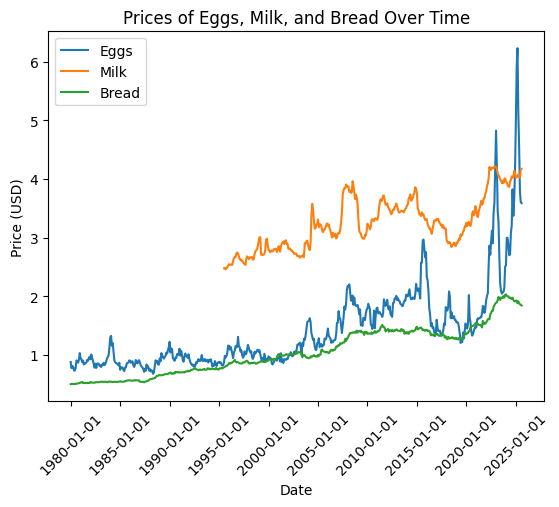

In [ ]:
# line plot of all items together to see how they compare against each other
plt.plot(egg_prices['date'], egg_prices['egg_price'], label = "Eggs")
plt.plot(milk_prices['date'], milk_prices['milk_price'], label = "Milk")
plt.plot(bread_prices['date'], bread_prices['bread_price'], label = "Bread")

# add label
plt.legend()
plt.title("Prices of Eggs, Milk, and Bread Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")

# spaces out date so that they dont overlap (by only showing every 60 dates, which is 5 years)
plt.xticks(plt.xticks()[0][::60], rotation = 45)

plt.show()

Immediately, we can see that the prices of these items have risen over time, with some moderate volatility. Bread seems to have the most steady change over time, whereas eggs have the most price volatility.

Correlation matrix:
              egg_price  milk_price  bread_price
egg_price     1.000000    0.772518     0.808570
milk_price    0.772518    1.000000     0.871049
bread_price   0.808570    0.871049     1.000000


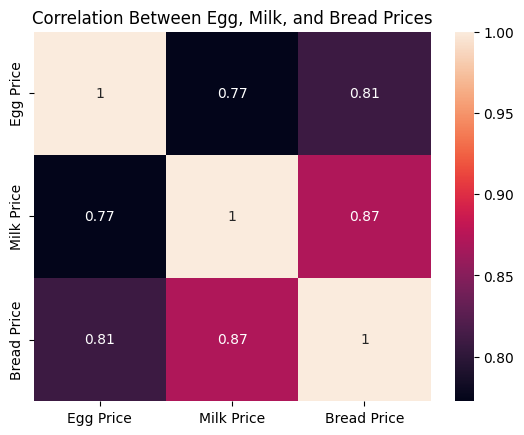

In [ ]:
# prep data for correlation by merging on dates so we can compare item prices directly
merged = egg_prices.merge(milk_prices, on = "date").merge(bread_prices, on = "date")

# create correlation matrix
corr = merged[['egg_price','milk_price','bread_price']].corr()
print("Correlation matrix:\n", corr)

# correlation heatmap to better visualize correlations, also added labels without the "_"
sns.heatmap(corr, annot=True,
            xticklabels=['Egg Price', 'Milk Price', 'Bread Price'],
            yticklabels=['Egg Price', 'Milk Price', 'Bread Price'])

# add title
plt.title("Correlation Between Egg, Milk, and Bread Prices")

plt.show()

We can see that there is a high correlation amongst these variables. Thus, there is risk for multicollinearity if we decided to create a multivariate regression model.

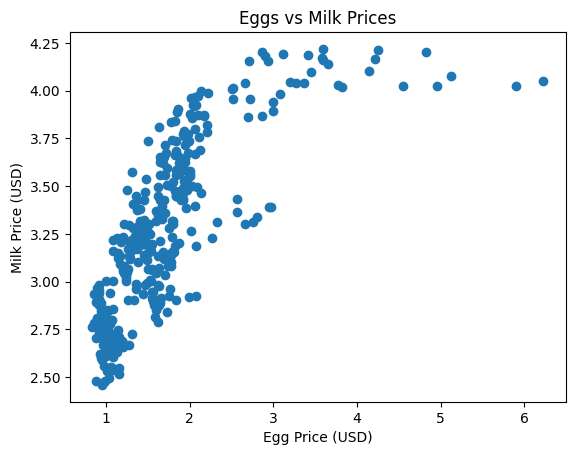

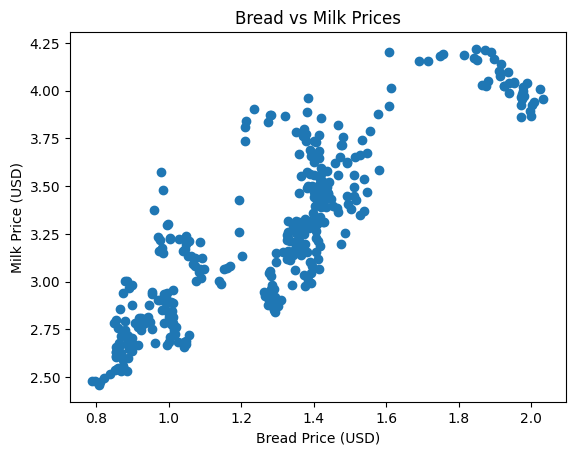

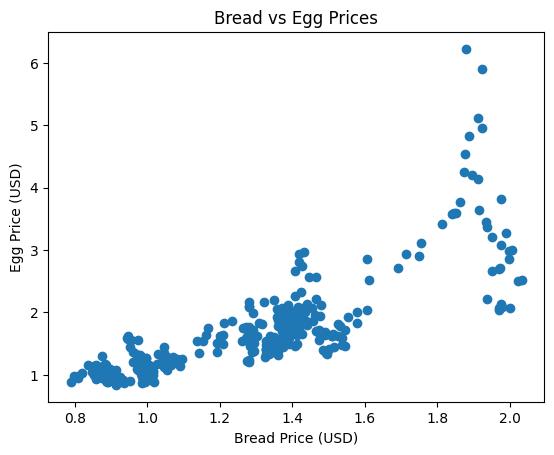

In [ ]:
# scatter plot of two item prices to visualize associations in price
plt.scatter(merged['egg_price'], merged['milk_price'])
plt.title("Eggs vs Milk Prices")
plt.xlabel("Egg Price (USD)")
plt.ylabel("Milk Price (USD)")
plt.show()

plt.scatter(merged['bread_price'], merged['milk_price'])
plt.title("Bread vs Milk Prices")
plt.xlabel("Bread Price (USD)")
plt.ylabel("Milk Price (USD)")
plt.show()

plt.scatter(merged['bread_price'], merged['egg_price'])
plt.title("Bread vs Egg Prices")
plt.xlabel("Bread Price (USD)")
plt.ylabel("Egg Price (USD)")
plt.show()

These graphs further confirm the high degreee of correlation between each of the variables. Milk vs bread prices seem to have the most inconsistent relationship without a clear trend. Bread vs egg prices appear to have a positive exponential relation, and the egg vs milk relationship could potentially be modeled by some kind of exponent or polynomial.

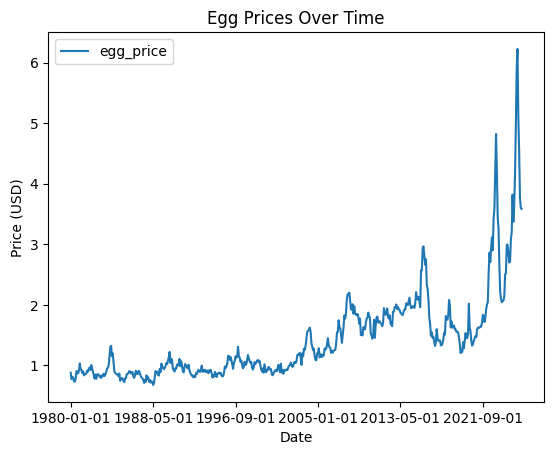

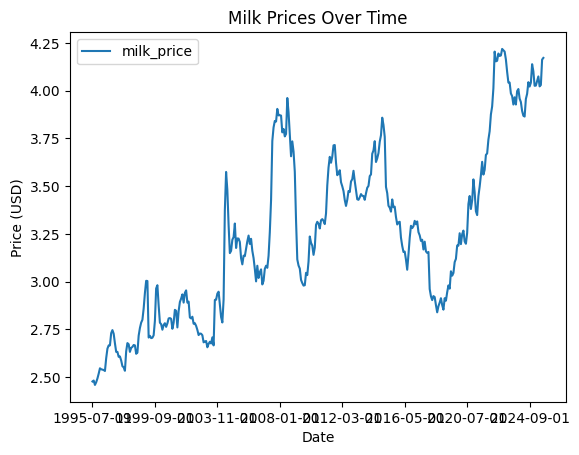

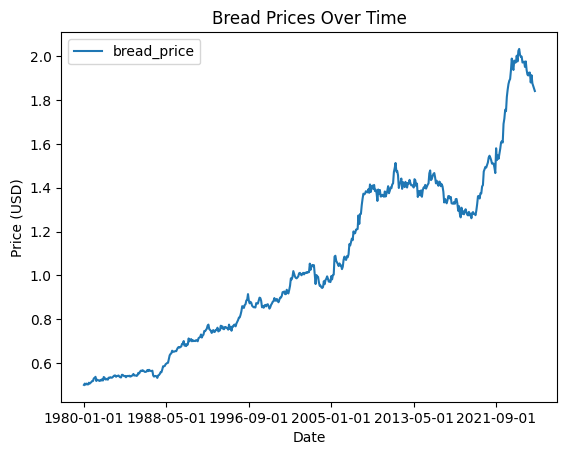

<Axes: title={'center': 'Bread Prices Over Time'}, xlabel='Date', ylabel='Price (USD)'>

In [ ]:
# graph individual item prices across time in line plots
egg_plot = egg_prices.plot(x = 'date', y = 'egg_price')
plt.title("Egg Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

milk_plot = milk_prices.plot(x = 'date', y = 'milk_price')
plt.title("Milk Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

bread_plot = bread_prices.plot(x = 'date', y = 'bread_price')
plt.title("Bread Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


egg_plot
milk_plot
bread_plot

Graphing the items separately, we can confirmed that each items has varying degrees of volatility.

In [ ]:
# Hypothesis test for correlation, just to be sure
# Ho: No correlation between variables
# Ha: Correlation between variables
# alpha = 0.05
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(merged['egg_price'], merged['milk_price'])
print('P-val of correlation between egg and milk prices: ', p_value)
correlation_coefficient, p_value = pearsonr(merged['bread_price'], merged['milk_price'])
print('P-val of correlation between bread and milk prices: ', p_value)
correlation_coefficient, p_value = pearsonr(merged['bread_price'], merged['egg_price'])
print('P-val of correlation between bread and egg prices: ', p_value)

P-val of correlation between egg and milk prices:  5.3898227329505073e-73
P-val of correlation between bread and milk prices:  3.4274963849772263e-113
P-val of correlation between bread and egg prices:  6.272112422992054e-85


Therefore, it is proven that all three variables are indeed correlated with each other. Originially, we were hoping to see if we could use these variables to create a multivariate regression to predict the interest rate, but that'd be inadvisable based on the high degree of correlation amongst the items.

However, we can still see if each variable could strongly predict the others' prices. Seeing that they are tightly correlated, this could yield a promising predictive model. For example, for further analysis, we could develop a regression model to predict the prices of milk based on the prices of eggs.

We then analyzed the percent change from year to year to see if there were certain patterns in pricing differences from year to year.

In [ ]:
# analyze percent change from year to year, see where there are jumps
egg_prices['year'] = pd.to_datetime(egg_prices['date']).dt.year
egg_prices_yearly = egg_prices.drop_duplicates(subset=['year'], keep='first')
egg_prices_yearly['Eggs YoY % Change'] = egg_prices_yearly['egg_price'].pct_change() * 100
egg_prices_yearly

/tmp/ipython-input-1292883621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_prices_yearly['Eggs YoY % Change'] = egg_prices_yearly['egg_price'].pct_change() * 100


,date,egg_price,year,Eggs YoY % Change
0,1980-01-01,0.879,1980,NaN
12,1981-01-01,0.943,1981,7.281001
24,1982-01-01,0.925,1982,-1.908802
36,1983-01-01,0.821,1983,-11.243243
48,1984-01-01,1.301,1984,58.465286
60,1985-01-01,0.746,1985,-42.659493
72,1986-01-01,0.901,1986,20.777480
84,1987-01-01,0.862,1987,-4.328524
96,1988-01-01,0.760,1988,-11.832947
108,1989-01-01,0.941,1989,23.815789


In [ ]:
# year to year changes for milk prices
milk_prices['year'] = pd.to_datetime(milk_prices['date']).dt.year
milk_prices_yearly = milk_prices.drop_duplicates(subset=['year'], keep='first')
milk_prices_yearly['Milk YoY % Change'] = milk_prices_yearly['milk_price'].pct_change() * 100
milk_prices_yearly

/tmp/ipython-input-275282434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milk_prices_yearly['Milk YoY % Change'] = milk_prices_yearly['milk_price'].pct_change() * 100


,date,milk_price,year,Milk YoY % Change
0,1995-07-01,2.477,1995,NaN
6,1996-01-01,2.546,1996,2.785628
18,1997-01-01,2.677,1997,5.145326
30,1998-01-01,2.632,1998,-1.680986
42,1999-01-01,2.940,1999,11.702128
54,2000-01-01,2.785,2000,-5.272109
66,2001-01-01,2.852,2001,2.405745
78,2002-01-01,2.812,2002,-1.402525
90,2003-01-01,2.686,2003,-4.480797
102,2004-01-01,2.879,2004,7.185406


In [ ]:
# year to year changes for bread prices
bread_prices['year'] = pd.to_datetime(egg_prices['date']).dt.year
bread_prices_yearly = bread_prices.drop_duplicates(subset=['year'], keep='first')
bread_prices_yearly['Bread YoY % Change'] = bread_prices_yearly['bread_price'].pct_change() * 100
bread_prices_yearly

/tmp/ipython-input-487707725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bread_prices_yearly['Bread YoY % Change'] = bread_prices_yearly['bread_price'].pct_change() * 100


,date,bread_price,year,Bread YoY % Change
0,1980-01-01,0.501,1980,NaN
12,1981-01-01,0.531,1981,5.988024
24,1982-01-01,0.537,1982,1.129944
36,1983-01-01,0.541,1983,0.744879
48,1984-01-01,0.543,1984,0.369686
60,1985-01-01,0.551,1985,1.473297
72,1986-01-01,0.566,1986,2.722323
84,1987-01-01,0.544,1987,-3.886926
96,1988-01-01,0.586,1988,7.720588
108,1989-01-01,0.653,1989,11.433447


/tmp/ipython-input-2004882487.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_prices_yearly['Eggs YoY % Change'] = egg_prices_yearly.iloc[:, 1].pct_change() * 100
/tmp/ipython-input-2004882487.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milk_prices_yearly['Milk YoY % Change'] = milk_prices_yearly.iloc[:, 1].pct_change() * 100
/tmp/ipython-input-2004882487.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

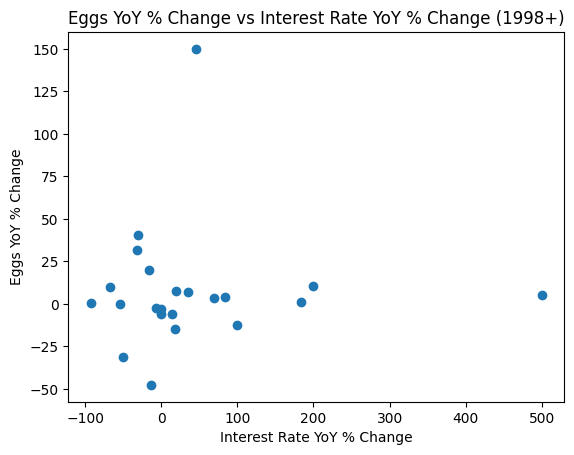

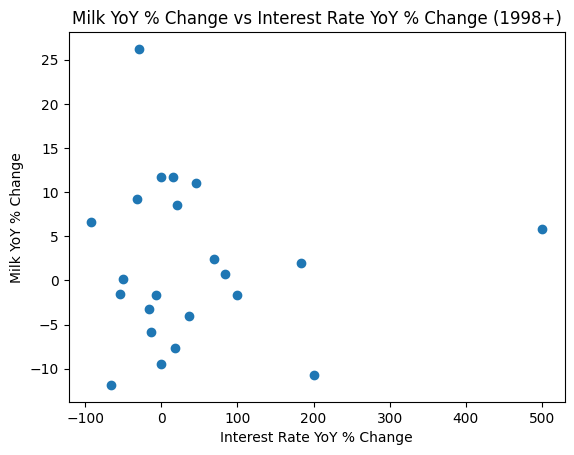

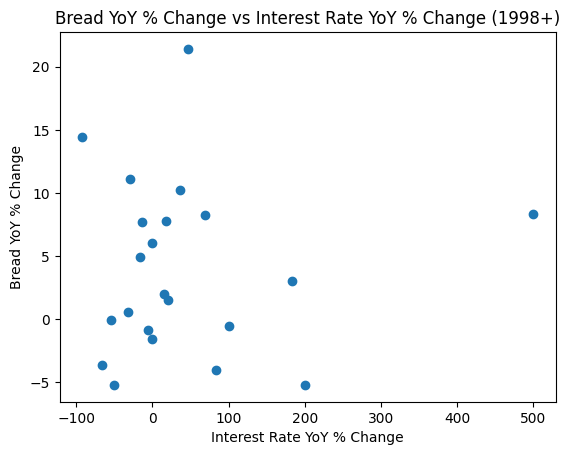

In [ ]:
# convert dates to datetime, this is needed to get the year
egg_prices['date'] = pd.to_datetime(egg_prices['date'])
milk_prices['date'] = pd.to_datetime(milk_prices['date'])
bread_prices['date'] = pd.to_datetime(bread_prices['date'])
interest_rates['Date of Issuance'] = pd.to_datetime(interest_rates['Date of Issuance'])

egg_prices['year'] = egg_prices['date'].dt.year
milk_prices['year'] = milk_prices['date'].dt.year
bread_prices['year'] = bread_prices['date'].dt.year
interest_rates['year'] = interest_rates['Date of Issuance'].dt.year

# convert interest rates to float
interest_rates['Interest Rate'] = interest_rates['Interest Rate'].astype(float)

# gets one value for each year
egg_prices_yearly = egg_prices.drop_duplicates(subset = ['year'], keep = 'first')
milk_prices_yearly = milk_prices.drop_duplicates(subset = ['year'], keep = 'first')
bread_prices_yearly = bread_prices.drop_duplicates(subset = ['year'], keep = 'first')
interest_rates_yearly = interest_rates.drop_duplicates(subset = ['year'], keep = 'first')

# calculate yearly percentage change for each category
egg_prices_yearly['Eggs YoY % Change'] = egg_prices_yearly.iloc[:, 1].pct_change() * 100
milk_prices_yearly['Milk YoY % Change'] = milk_prices_yearly.iloc[:, 1].pct_change() * 100
bread_prices_yearly['Bread YoY % Change'] = bread_prices_yearly.iloc[:, 1].pct_change() * 100
interest_rates_yearly['Interest Rate YoY % Change'] = interest_rates_yearly['Interest Rate'].pct_change() * 100

# merge everything on 'year'
merged = egg_prices_yearly[['year', 'Eggs YoY % Change']] \
    .merge(milk_prices_yearly[['year', 'Milk YoY % Change']], on = 'year', how = 'outer') \
    .merge(bread_prices_yearly[['year', 'Bread YoY % Change']], on = 'year', how = 'outer') \
    .merge(interest_rates_yearly[['year', 'Interest Rate YoY % Change']], on = 'year', how = 'outer')

# filter to include only from 1998
merged = merged[merged['year'] >= 1998]

# eggs vs interest rate YoY change scatterplot
plt.scatter(merged['Interest Rate YoY % Change'], merged['Eggs YoY % Change'])
plt.title('Eggs YoY % Change vs Interest Rate YoY % Change (1998+)')
plt.xlabel('Interest Rate YoY % Change')
plt.ylabel('Eggs YoY % Change')
plt.show()

# milk vs interest rate YoY change scatterplot
plt.scatter(merged['Interest Rate YoY % Change'], merged['Milk YoY % Change'])
plt.title('Milk YoY % Change vs Interest Rate YoY % Change (1998+)')
plt.xlabel('Interest Rate YoY % Change')
plt.ylabel('Milk YoY % Change')
plt.show()

# bread vs interest rate YoY change scatterplot
plt.scatter(merged['Interest Rate YoY % Change'], merged['Bread YoY % Change'])
plt.title('Bread YoY % Change vs Interest Rate YoY % Change (1998+)')
plt.xlabel('Interest Rate YoY % Change')
plt.ylabel('Bread YoY % Change')
plt.show()

These graphs, which visualizes the relationship between the yearly change of interest rate and the yearly change of commodities show that there are no significant degreee of correlation between interest rates and the studied commodities of eggs, bread, and milk. The egg price change seem to have almost no correlation with intrest rate, as it was clustered between the -25% ~ 50% regardless of the change of interest rate. Change of milk price also seem to have no correlation with the change of intrest rate, as the milk price is very volitile even when the change in interest rate is near zero. Similar to milk price change, bread price also shows volitile price changes even when the interest rate barely changes.

In [ ]:
# Calculate yearly percentage change for interest rates
interest_rates['Date of Issuance'] = pd.to_datetime(interest_rates['Date of Issuance'])
interest_rates['year'] = interest_rates['Date of Issuance'].dt.year
interest_rates['Interest Rate'] = interest_rates['Interest Rate'].astype(float)

# Since interest rate data is not monthly, we will take the first entry for each year for simplicity
interest_rates_yearly = interest_rates.drop_duplicates(subset=['year'], keep='first')
interest_rates_yearly['Interest Rate YoY % Change'] = interest_rates_yearly['Interest Rate'].pct_change() * 100
interest_rates_yearly



# Merge the yearly dataframes on the 'year' column
merged_yearly_data = egg_prices_yearly[['year', 'Eggs YoY % Change']].merge(
    milk_prices_yearly[['year', 'Milk YoY % Change']], on='year', how='outer'
).merge(
    bread_prices_yearly[['year', 'Bread YoY % Change']], on='year', how='outer'
).merge(
    interest_rates_yearly[['year', 'Interest Rate YoY % Change']], on='year', how='outer'
)

# Filter to include only from 1998
merged_yearly_data = merged_yearly_data[merged_yearly_data['year'] >= 1998]


merged_yearly_data =merged_yearly_data.dropna(subset=['Eggs YoY % Change', 'Milk YoY % Change', 'Bread YoY % Change', 'Interest Rate YoY % Change'])
#If you look at the data table, there are some gaps in the time. This is because there is no interest rate disclosed, and may have stayed the same.

merged_yearly_data

/tmp/ipython-input-2842909213.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_rates_yearly['Interest Rate YoY % Change'] = interest_rates_yearly['Interest Rate'].pct_change() * 100


,year,Eggs YoY % Change,Milk YoY % Change,Bread YoY % Change,Interest Rate YoY % Change
18,1998,-2.439024,-1.680986,-0.812065,-6.451613
19,1999,-5.982143,11.702128,1.988304,14.814815
21,2001,3.692308,2.405745,8.269019,68.750000
26,2006,19.653179,-3.238499,4.914744,-15.789474
27,2007,6.901311,-4.066312,10.229446,35.714286
28,2008,40.413170,26.214542,11.101474,-30.000000
29,2009,-14.942529,-7.646603,7.806401,17.647059
30,2010,-3.297297,-9.482517,-1.520637,0.000000
31,2011,0.950252,2.008653,3.014706,183.333333
32,2012,7.364341,8.542866,1.570307,20.000000


In [ ]:

# compare each item individually against interest rates (1998 and on)
# analyze correlations

# change df in the code below the final dataframe name with all of the data of YoY Change and interest Rate change yoy

results = {}
correlation = {}
for col in ['Eggs YoY % Change', "Milk YoY % Change", "Bread YoY % Change"]:
    corr, pval = pearsonr(merged_yearly_data[col], merged_yearly_data['Interest Rate YoY % Change'])
    results[col] = {'Correlation': corr, 'P-Value': pval}

results_df = pd.DataFrame(results).T
results_df

,Correlation,P-Value
Eggs YoY % Change,0.034570,0.878612
Milk YoY % Change,-0.021092,0.925772
Bread YoY % Change,0.027837,0.902131


After creating a table of eggs, milk, bread, and interest rate's yearly change, from 1998 to 2024, we analyzed the correlation and the p-value between the commodities and the interest rate. Similar to the conclusion drawn from the graph above, the calculation table also indicates that interest rates do not significantly affect eggs, milk, and bread, as p-value is much greater than 0.05 and correlation is very low.